# APPRENTISSAGE NON-SUPERVISÉ

## 1- CLUSTERING : K-Means

### Hyperparametres

#### .n_cluster:nombre K de clusters
#### .n_init:nombre d'exéution
#### .max_iter:nombre d'itérations(300)
#### .Init:type d'initialisation(K_means++)

### Méthodes:

#### .Fit(X):exécute l'algorithme K-Mean
#### .Predict(X):centroid le plus proche de X
#### .Score(X):Calcul de l'inertia(négatif)

### Attributs:

#### .cluster_centers_:position des centroids
#### .Labels:équivaut de Predict(Xtrain)
#### .Inertia:Calcul de l'inertia (positif)

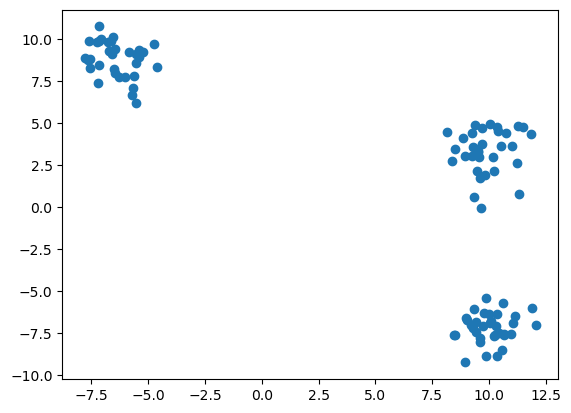

In [3]:
#Génération de données
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=100, centers=3, cluster_std=1.0)

plt.scatter(X[:,0],X[:,1])

In [4]:
from sklearn.cluster import KMeans

In [4]:
from sklearn.cluster import KMeans

In [7]:
#Les parametre
#n_init=10,maxiter=200,init=K-Means++

model=KMeans(n_clusters=3,n_init=10)
model.fit(X)
model.predict(X)

array([2, 2, 0, 2, 1, 0, 1, 1, 1, 2, 2, 0, 1, 0, 0, 1, 2, 2, 1, 1, 0, 2,
       2, 1, 0, 0, 0, 1, 1, 0, 2, 2, 2, 2, 0, 1, 2, 1, 0, 1, 1, 2, 2, 2,
       2, 1, 0, 2, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 0,
       1, 0, 2, 0, 2, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 2,
       0, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

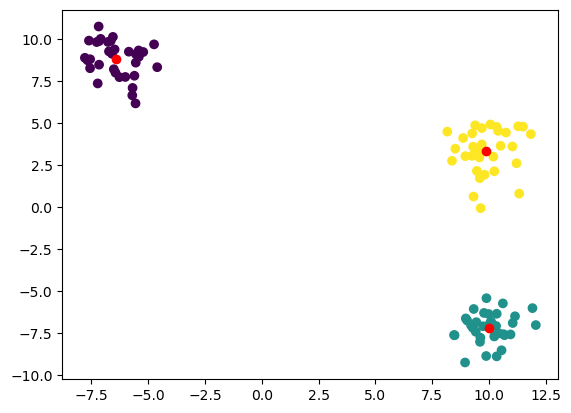

In [13]:
plt.scatter(X[:,0],X[:,1],c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c='r')

In [14]:
model.inertia_

192.84459356193585

Pour trouver le bon nombre de clusters : << Eibow Method>> : Détecter une zone de << coude >> dans la minimisation du coût(Inertia_)

In [16]:
inertia=[]
k_range=range(1,30)
for k in k_range:
    model=KMeans(n_clusters=k,n_init=10).fit(X)
    inertia.append(model.inertia_)

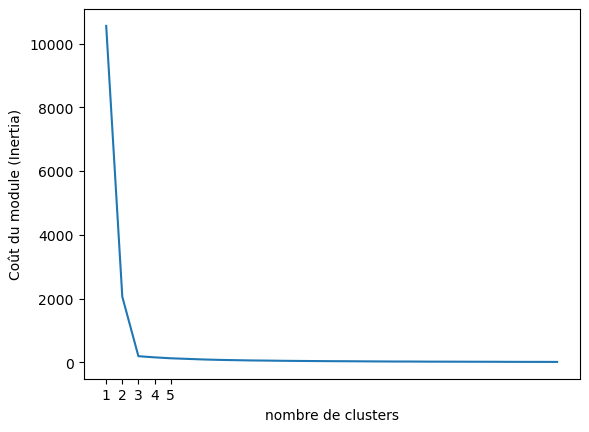

In [18]:
plt.plot(k_range,inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Coût du module (Inertia)')

custom_xticks = [1, 2, 3, 4, 5]  # Les valeurs que vous voulez afficher
plt.xticks(custom_xticks)

plt.show()